<a href="https://colab.research.google.com/github/wallisonferreira/data-science-tce/blob/main/1_Primeiros_Passos_%5BMLP%2BExperimentos%2BEstruturado%5D_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeiros Passos

Agenda:
- utilizar as bibliotecas para aprendizado de máquina
- limpeza e tratamento de dados, com dataset estruturado
- criar um modelo MLP
- realizar experimentos
- realizar análise de resultados
- refatorar código para que seja reutilizável

Libs que usaremos:
- Tensorflow
- Keras
- Sklearn
- Numpy

e algumas outras auxiliares




In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import sklearn as sk

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 7.8 MB/s 
     |████████████████████████████████| 381 kB 38.7 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


#Etapa 1: Dataset
- Aquisição
- Análise inicial
- Preparação

Neste exemplo, utilizaremos o dataset Heart Disease ( [leia mais aqui](https://archive.ics.uci.edu/ml/datasets/heart+Disease)).
*Link com o dataset: http://storage.googleapis.com/download.tensorflow.org/data/heart.csv


In [ ]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/heart.csv')
#dataframe.describe().transpose()
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [ ]:
from tensorflow.keras.utils import to_categorical

#obter o target
y = dataframe['target']
#formato desejado
'''
[
  [1 , 0]
  [0 , 1]
  ...
]
'''
#dataframe = dataframe.drop(columns=['target'])
y = to_categorical(y, num_classes=2)
#y

In [ ]:
#trabalhar nas features
#converter categoricas para onehotencode
#remover o que não é necessário
#normalizar
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize

def preProcess(features):
  encoder = OneHotEncoder(handle_unknown='ignore')
  campos = pd.DataFrame(
      encoder.fit_transform(features).toarray()
  )
  return campos

encoded = preProcess(dataframe[['sex', 'cp', 'fbs', 'restecg', 'exang',
                                'slope', 'ca', 'thal']])
dataframe = dataframe.join(encoded)
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,16,17,18,19,20,21,22,23,24,25
0,63,1,1,145,233,1,2,150,0,2.3,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,67,1,4,160,286,0,2,108,1,1.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,67,1,4,120,229,0,2,129,1,2.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,37,1,3,130,250,0,0,187,0,3.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
dataframe = dataframe.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang',
                                'slope', 'ca', 'thal', 'target'])
dataframe.head()


,age,trestbps,chol,thalach,oldpeak,0,1,2,3,4,...,16,17,18,19,20,21,22,23,24,25
0,63,145,233,150,2.3,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,67,160,286,108,1.5,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,67,120,229,129,2.6,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,37,130,250,187,3.5,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,41,130,204,172,1.4,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#normalizar os valores
X = normalize(dataframe.to_numpy(), axis = 0)
X

array([[0.06541079, 0.06264532, 0.05311908, ..., 0.23570226, 0.        ,
        0.        ],
       [0.06956386, 0.06912587, 0.06520196, ..., 0.        , 0.07715167,
        0.        ],
       [0.06956386, 0.05184441, 0.05220716, ..., 0.        , 0.        ,
        0.09325048],
       ...,
       [0.06748733, 0.05832496, 0.05790663, ..., 0.        , 0.        ,
        0.09325048],
       [0.04983679, 0.05616477, 0.05836259, ..., 0.        , 0.        ,
        0.09325048],
       [0.06541079, 0.06480551, 0.0927874 , ..., 0.        , 0.        ,
        0.09325048]])

#Etapa 2: Montar o modelo

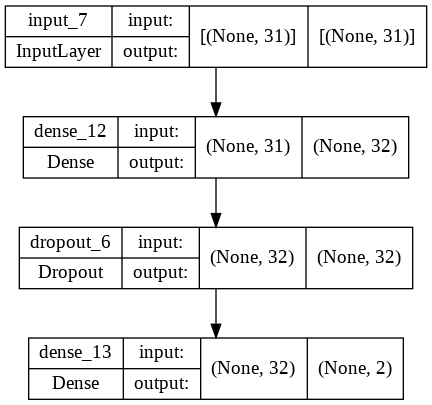

In [ ]:
from tensorflow.keras.utils import plot_model

def construirModelo(input_shape):
  model = keras.Sequential(
      [layers.Input(shape= input_shape) ,
       layers.Dense(32, activation='relu'),
       layers.Dropout(0.45),
       #softmax = probabilidade de pertecer a classe do índice
       layers.Dense(2, activation='softmax')
      ]
  )

  #especificar: otimizador e função de custo
  model.compile("adam", "categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = construirModelo(X.shape[1])
plot_model(model, show_shapes=True)


#Etapa 3: Experimento -- com Hold-Out


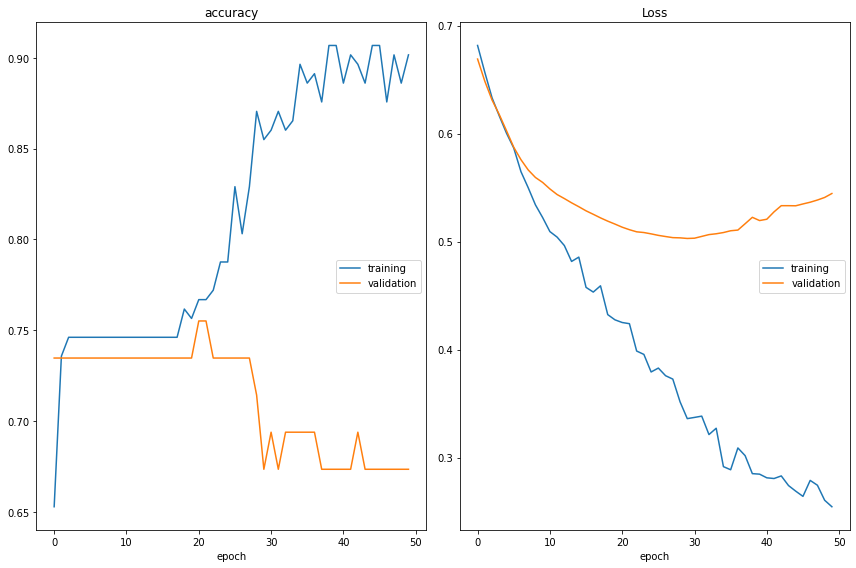

accuracy
	training         	 (min:    0.653, max:    0.907, cur:    0.902)
	validation       	 (min:    0.673, max:    0.755, cur:    0.673)
Loss
	training         	 (min:    0.254, max:    0.682, cur:    0.254)
	validation       	 (min:    0.503, max:    0.669, cur:    0.545)
13/13 [==============================] - 1s 44ms/step - loss: 0.2545 - accuracy: 0.9016 - val_loss: 0.5445 - val_accuracy: 0.6735
Matriz interação 4:
Recall: 0.8393442622950819 +- 0.04198769991759245
Precisão: 0.8407414720951477 +- 0.049096070870072984
F1: 0.8307050366065363 +- 0.04642039548686309


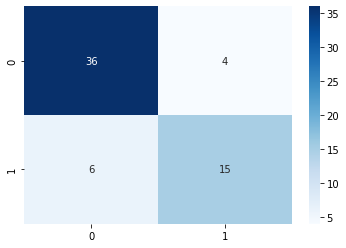

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
import random
import seaborn as sns
from livelossplot import PlotLossesKeras


n_runs = 5 #número de execuções
perc_treino = 0.8
batch_size = 16
epochs = 50

recall = []
prec = []
f1 = []

for i in range(n_runs):

  #pre-requisito
  model = construirModelo(X.shape[1])

  #a) divide a base aleatoriamente
  x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                      train_size=perc_treino,
                                                      random_state = random.randint(1, 1000))
  #b) treina
  H = model.fit(
      x_train,
      y_train,
      batch_size= batch_size,
      epochs = epochs,
      callbacks=[PlotLossesKeras()], #plotando gráficos
      validation_split = 0.2
  )

  #c) predição
  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis = 1)
  y_true = np.argmax(y_test, axis = 1)

  #d) acumula resultados
  recall.append(recall_score(y_true, y_pred, average='weighted'))
  prec.append(precision_score(y_true, y_pred, average='weighted'))
  f1.append(f1_score(y_true, y_pred, average='weighted'))

  matrix = confusion_matrix(y_true, y_pred)
  print("Matriz interação " + str(i) + ":")
  sns.heatmap(matrix, cmap='Blues', annot=True)

#calculando as médias das execuções
recall_media = np.asarray(recall).mean(axis=0)
prec_media = np.asarray(prec).mean(axis=0)
f1_media = np.asarray(f1).mean(axis=0)

#calculando os desvios das execuções
recall_std = np.asarray(recall).std(axis=0)
prec_std = np.asarray(prec).std(axis=0)
f1_std = np.asarray(f1).std(axis=0)

print ("Recall: " + str(recall_media) + " +- " + str(recall_std))
print ("Precisão: " + str(prec_media) + " +- " + str(prec_std))
print ("F1: " + str(f1_media) + " +- " + str(f1_std))



'              precision    recall  f1-score   support\n\n           0       0.91      0.93      0.92        46\n           1       0.79      0.73      0.76        15\n\n    accuracy                           0.89        61\n   macro avg       0.85      0.83      0.84        61\nweighted avg       0.88      0.89      0.88        61\n'

#Etapa 4: Experimento -- com Cross-Validation (adicional)